# Introduction
The sinking of Titanic is one of the most notorious shipredcks in history. In 1912, during her voyage, the titanic sank after colliding with an iceberg, killing 1502 out of 2224 passangers and crew.

<font color = "gray">
Content:

1. [Load and Check Data](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable Analysis](#4)
        * [Numerical Variable Analysis](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Values](#8)
    * [Find Missing Values](#9)
    * [Fill Missing Values](#10)
1. [Visualization](#11)
    * [Correlation Between SibSp -- Parch -- Age -- Pclass -- Fare -- Survived](#12)
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Age -- Survived](#15)
    * [Pclass -- Survived](#16)
    * [Fare -- Survived](#17)
    * [Pclass -- Age -- Survived](#18)
    * [Embarked -- Sex -- Pclass - Survived](#19)
    * [Embarked -- Sex -- Fare - Survived](#20)
    * [Fill Missing Age Value](#21)
1. [Feature Engineering](#22)
    * [Name -- Title](#23)
    * [Family Size](#24)
    * [Embarked](#25)
    * [Ticket](#26)
    * [Pclass](#27)
    * [Sex](#28)
1. [Modelling](#29)
    * [Train - Test - Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32)
    * [Ensemble Modelling](#33)
    * [Prediction & Submission](#34)
        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<a id = "1"></a>
# Load and Check Data 

In [2]:
train_df = pd.read_csv("C:/Users/MRE/Documents/GitHub/Titanic-Project/Dataset/train.csv")
test_df = pd.read_csv("C:/Users/MRE/Documents/GitHub/Titanic-Project/Dataset/test.csv")
test_PassangerId = test_df["PassengerId"]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a><
# Variable Description

1. PassengerId: Unique id number of passanger
2. Survived: Passanger who survive (1) or die (0)
3. Pclass: Passanger Class
4. Name: Name
5. Sex: Gender of Passanger
6. Age: Age of Passanger
7. SibSp: Number of siblins/spouses
8. Parch: Number of parents/children
9. Ticket:  Ticket Number
10. Fare: Amount of money spent on ticket
11. Cabin: Cabin Category
12. Embarke: Port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southmpton)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare and Age
* int64(5): Pclass, Sibsp, Parch, PassangerId, Survived
* object(5): Cabin, Embarked, Ticket, Name and Sex

<a id="3"></a><br>
# Univariate Variable Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Fare, age and PassengerId

<a id="4"></a><br>
## Categorical Variable Analysis

In [6]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """

    var = train_df[variable] #Get Feature
    varValue = var.value_counts() #Count number of categorical variable(value/sample)

    #Visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

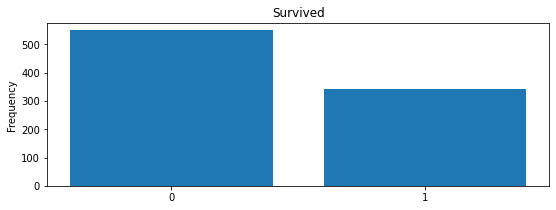

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


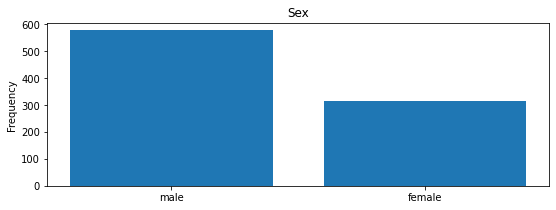

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


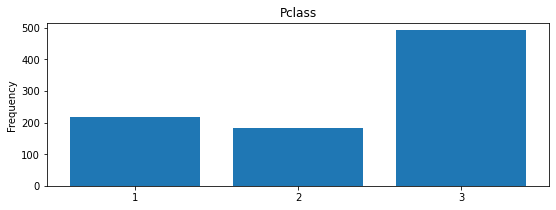

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


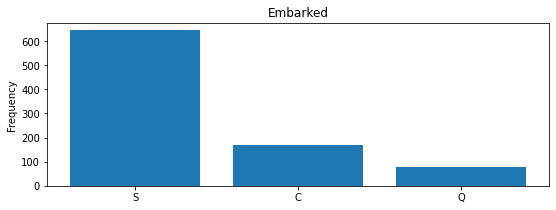

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


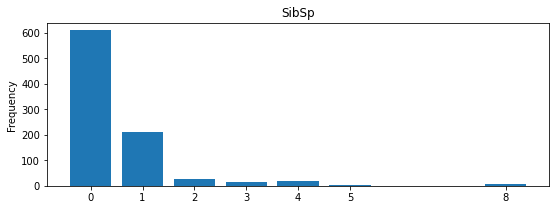

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


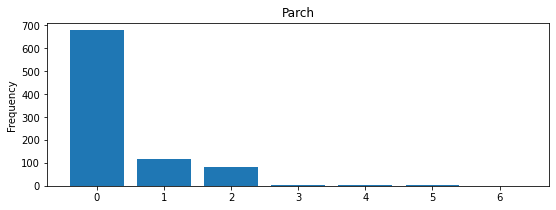

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [7]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

<a id="5"></a><br>
## Numerical Variable Analysis

In [8]:
def plot_hist(variable):
    plt.figure(figsize=(9, 3))
    plt.hist(train_df[variable])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist.".format(variable))
    plt.show()

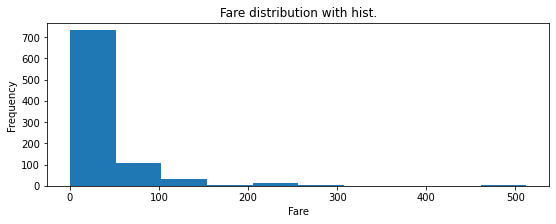

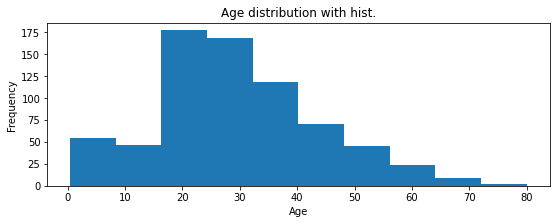

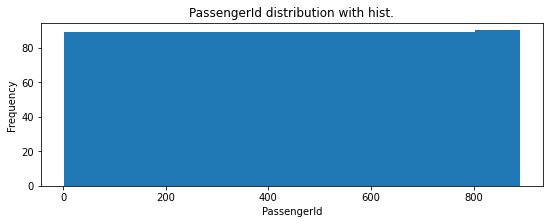

In [9]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id="6"></a><br>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* Parch - Survived
* SibSp - Survived

In [10]:
# Pclass & Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [13]:
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<a id="7"></a><br>
# Outlier Detection

In [14]:
from collections import Counter


def detect_outlier(df, features):
    outlier_indices = []
    
    for c in features:

        #1st quartile
        Q1 = np.percentile(df[c], 25)
        #3rd quartile
        Q3 = np.percentile(df[c], 75)
        #IQR
        IQR = Q3 - Q1
        #Outlier Step
        outlier_step = IQR * 1.5
        #Detect Outlier and Their Indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 - outlier_step)].index
        #Store indeces
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [15]:
train_df.loc[detect_outlier(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [16]:
#Drop Outliers
train_df = train_df.drop(detect_outlier(train_df, ["Age", "SibSp", "Parch", "Fare"]), axis=0).reset_index(drop=True)

<a id="8"></a><br>
# Missing Values

In [17]:
train_df_len = len(train_df)
train_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

<a id="9"></a><br>
## Find Missing Values

In [18]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [19]:
train_df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            243
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          864
Embarked         2
dtype: int64

<a id="10"></a><br>

## Fill Missing Values

In [20]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
48,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
633,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


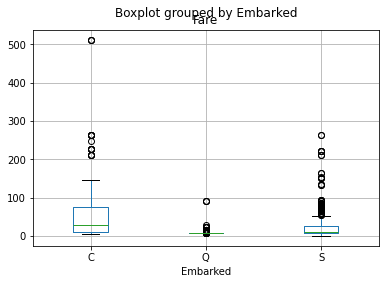

In [21]:
train_df.boxplot(column="Fare", by="Embarked")
plt.show()

In [22]:
train_df["Embarked"] = train_df["Embarked"].fillna('C')
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [23]:
train_df[train_df["Fare"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
830,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [24]:
train_df["Fare"] =train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))


In [25]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id="11"></a><br>
# Visualization

<a id="12"></a><br>
## Correlation Between SibSp -- Parch -- Age -- Fare -- Survived

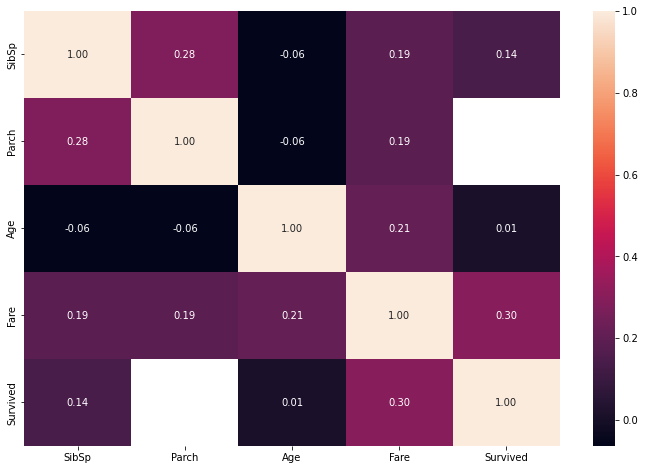

In [26]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[list1].corr(), annot=True, fmt=".2f")
plt.show()

Fare feature seems to have correlation with survived feature (0.30)

<a id="13"></a><br>
## Sibsp -- Survived

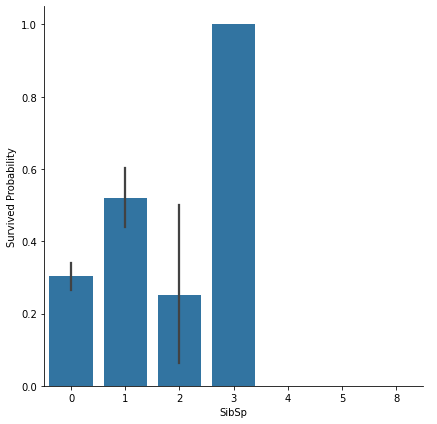

In [27]:
g = sns.catplot(x="SibSp", y="Survived", data=train_df, kind="bar", height=6)
g.set_ylabels("Survived Probability")
plt.show()

* Having lots of SipSp have less chance to survive.
* If sipsp = 0 or 1 or 2, passenger has more chance to survive
* We can consider a new feature describing these categories.

<a id="14"></a><br>
## Parch -- Survived

* Sibsp and parch can be used for new feature extraction with th=3
* Small families have more chance to survive.
* There is a std in survival of parch = 3

<a id = "15"></a><br>
## Pclass -- Survived

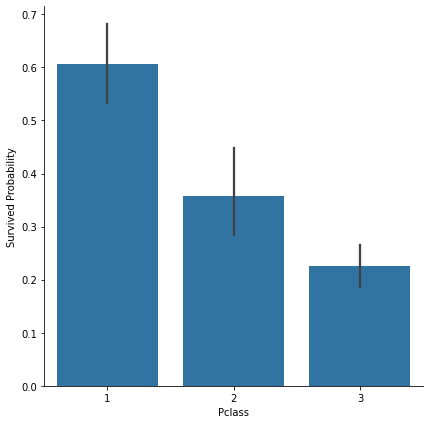

In [28]:
g = sns.catplot(x="Pclass", y="Survived", data=train_df, kind="bar", height=6)
g.set_ylabels("Survived Probability")
plt.show()

<a id = "16"></a><br>
## Age -- Survived

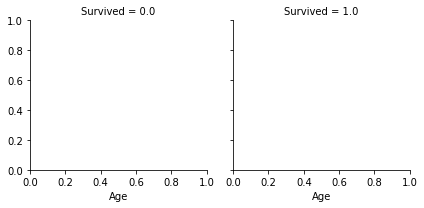

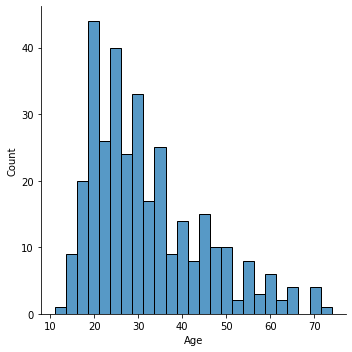

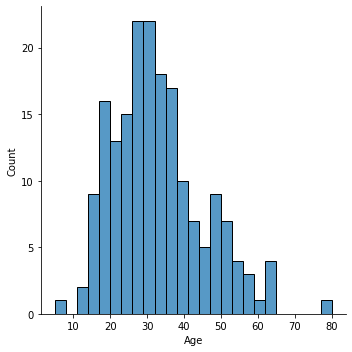

In [29]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(sns.displot, "Age", bins=25)
plt.show()

* Age <= 10 has a high survival rate
* Oldest passanger (80) survived
* Large number of 20 years old could not survive
* Most of the passangers are between 15 and 35.

<a id="18"></a><br>
## Pclass -- Age -- Survived

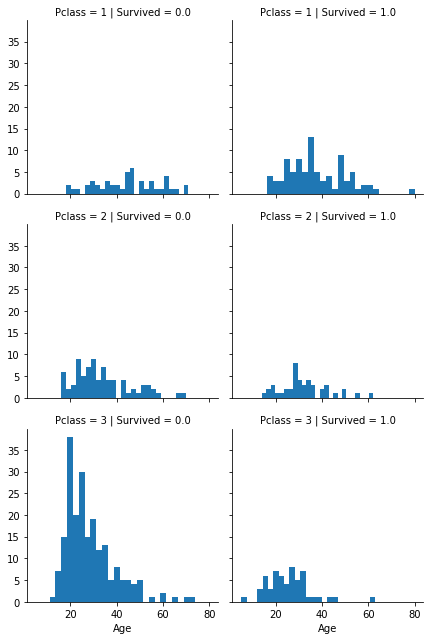

In [30]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass")
g.map(plt.hist, "Age", bins=25)
g.add_legend()
plt.show()

Pclass is a important feature for modelling.

<a id="19"></a><br>
## Embarked -- Sex -- Pclass - Survived

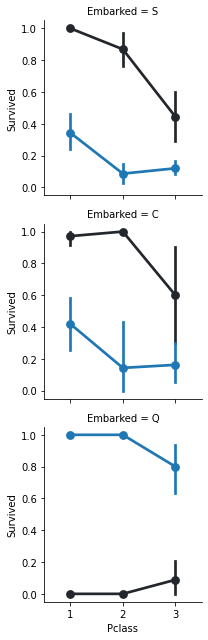

In [31]:
g = sns.FacetGrid(train_df, row="Embarked")
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
plt.show()

* Female passangers have much bettwe survival rate than male passangers.
* Male passangers have bettwe survival rate in pclass 3 in C.
* Embarked and sex will be used in training.

<a id="20"></a><br>
## Embarked -- Sex -- Pclass - Survived

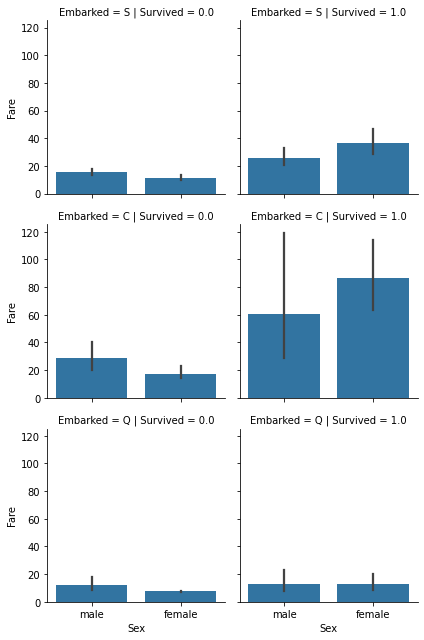

In [32]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived")
g.map(sns.barplot, "Sex", "Fare")
plt.show()

Passengers who paid higher fare have better survival rate
Fair can bu used as categorical.


<a id="21"></a><br>
## Fill Age Missing Values

In [33]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
12,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
14,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
19,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
20,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1086,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1088,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1091,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1094,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


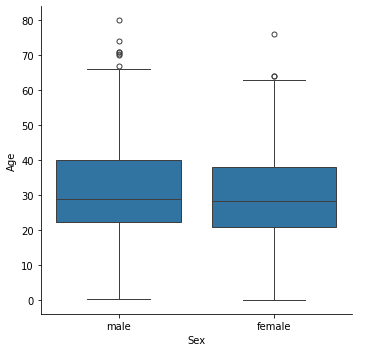

In [34]:
sns.catplot(x = "Sex", y = "Age", data=train_df, kind="box")
plt.show()

Sex is not informative for age prediction. Age distribution seems same.

<a id="22"></a><br>
# Feature Enginerring

<a id="23"></a><br>
## Name -- Title

In [35]:
train_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [36]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [37]:
train_df["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

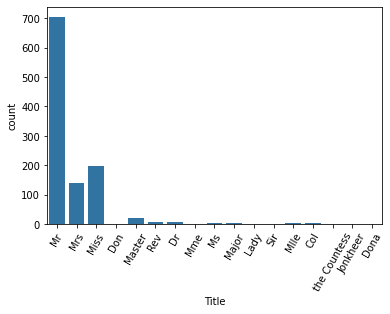

In [38]:
sns.countplot(x = "Title", data = train_df)
plt.xticks(rotation=60)
plt.show()

In [39]:
# Convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady", "the Countess", "Capt", "Col"
 "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "other")

train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]

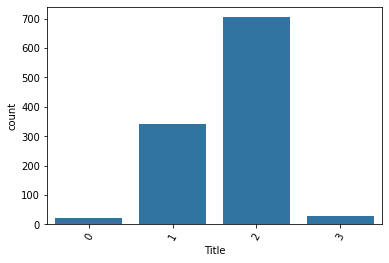

In [40]:
sns.countplot(x = "Title", data = train_df)
plt.xticks(rotation=60)
plt.show()

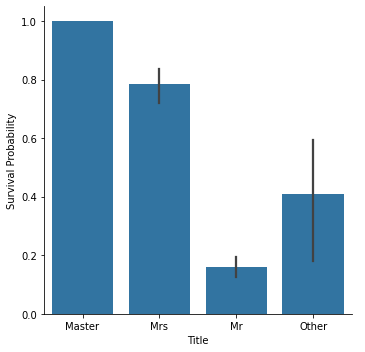

In [41]:
g = sns.catplot(x = "Title", y = "Survived", data = train_df, kind="bar")
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
g.set_ylabels("Survival Probability")
plt.show()

So for now, we can drop the Name feature.

In [42]:
train_df.drop(labels= ["Name"], axis=1, inplace=True)

In [43]:
# Make Title column categorical again !..
train_df = pd.get_dummies(train_df, columns=["Title"])
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1305,NaN,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,False,False,True,False
1092,1306,NaN,1,female,39.0,0,0,PC 17758,108.9000,C105,C,False,False,False,True
1093,1307,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,False,True,False
1094,1308,NaN,3,male,NaN,0,0,359309,8.0500,NaN,S,False,False,True,False


<a id="24"></a><br>
## Family Size

In [44]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


In [45]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1 #If a person has no family members with them (no siblings, spouse, parent, or child), then they are alone, and the total count should be 1.

In [46]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


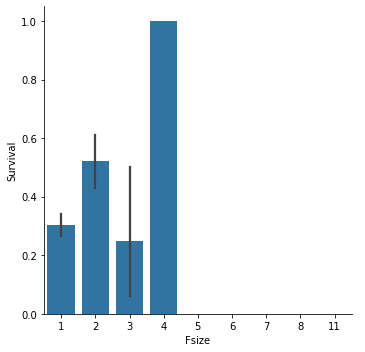

In [47]:
g = sns.catplot(x = "Fsize", y = "Survived", data=train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [48]:
train_df["family_size"] = [1 if i<4 else 0 for i in train_df["Fsize"]]

In [49]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1


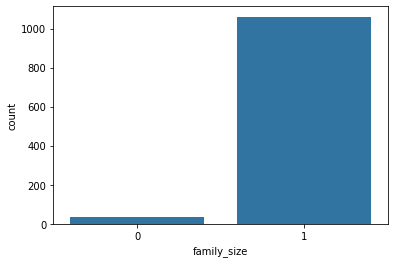

In [50]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

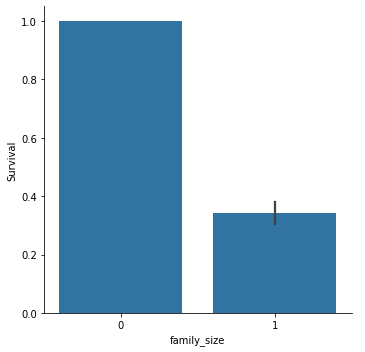

In [51]:
g = sns.catplot(x = "family_size", y = "Survived", data=train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

Small families have more chance to surive.

In [52]:
train_df = pd.get_dummies(train_df, columns=["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True


<a id="25"></a><br>
## Embarked

In [53]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

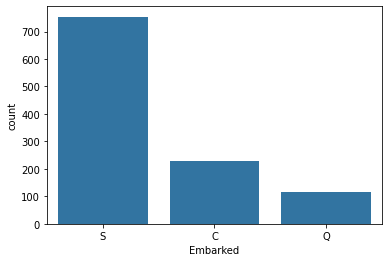

In [54]:
sns.countplot(x = "Embarked", data=train_df)
plt.show()

In [55]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


<a id="26"></a><br>
## Ticket

In [56]:
train_df["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [57]:
tickets = []
for i in list(train_df["Ticket"]):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")

train_df["Ticket"] = tickets
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A5,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1.0,1,female,38.0,1,0,PC,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1.0,3,female,26.0,0,0,STONO2,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1.0,1,female,35.0,1,0,x,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0.0,3,male,35.0,0,0,x,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


In [58]:
train_df = pd.get_dummies(train_df, columns=["Ticket"], prefix="T")
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1.0,1,female,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,True,False,False,False,False,False
3,4,1.0,1,female,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True


<a id="27"></a><br>
## Pclass

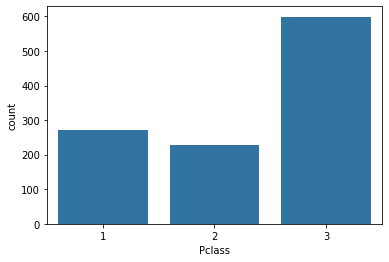

In [59]:
sns.countplot(x = "Pclass", data=train_df)
plt.show()

In [60]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,male,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1.0,female,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1.0,female,26.0,0,0,7.9250,NaN,False,True,...,False,True,False,False,False,False,False,False,False,True
3,4,1.0,female,35.0,1,0,53.1000,C123,False,True,...,False,False,False,False,False,False,True,True,False,False
4,5,0.0,male,35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


<a id="28"></a><br>
## Sex

In [61]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0.0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2,1.0,38.0,1,0,71.2833,C85,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1.0,26.0,0,0,7.9250,NaN,False,True,False,...,False,False,False,False,False,False,False,True,True,False
3,4,1.0,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0.0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True


In [62]:
train_df.drop(["PassengerId", "Cabin", "Age"], axis=1, inplace=True)

<a id="29"></a><br>
# Modelling

In [63]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id="30"></a><br>
## Train - Test - Split

In [64]:
train_df_len

678

In [65]:
test = train_df[train_df_len:]
test.drop(labels=["Survived"], axis=1, inplace=True)
test.head()

,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
678,0,0,7.8292,False,False,True,False,1,False,True,...,False,False,False,False,True,False,False,True,False,True
679,1,0,7.0000,False,True,False,False,2,False,True,...,False,False,False,False,True,False,False,True,True,False
680,0,0,9.6875,False,False,True,False,1,False,True,...,False,False,False,False,True,False,True,False,False,True
681,0,0,8.6625,False,False,True,False,1,False,True,...,False,False,False,False,True,False,False,True,False,True
682,1,1,12.2875,False,True,False,False,3,False,True,...,False,False,False,False,True,False,False,True,True,False


In [66]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (454, 55)
X_test:  (224, 55)
y_train:  (454,)
y_test:  (224,)


In [67]:
X_train.isnull().sum()

SibSp            0
Parch            0
Fare             0
Title_0          0
Title_1          0
Title_2          0
Title_3          0
Fsize            0
family_size_0    0
family_size_1    0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
T_A              0
T_A4             0
T_A5             0
T_AQ3            0
T_AQ4            0
T_AS             0
T_C              0
T_CA             0
T_CASOTON        0
T_FC             0
T_FCC            0
T_Fa             0
T_LINE           0
T_LP             0
T_PC             0
T_PP             0
T_PPP            0
T_SC             0
T_SCA3           0
T_SCA4           0
T_SCAH           0
T_SCOW           0
T_SCPARIS        0
T_SCParis        0
T_SOC            0
T_SOP            0
T_SOPP           0
T_SOTONO2        0
T_SOTONOQ        0
T_SP             0
T_STONO          0
T_STONO2         0
T_STONOQ         0
T_SWPP           0
T_WC             0
T_WEP            0
T_x              0
Pclass_1         0
Pclass_2         0
Pclass_3    

<a id="31"></a><br>
## Simple Logistic Regression

In [68]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100, 2)
acc_log_test = round(logreg.score(X_test, y_test)*100, 2)
print("Training Accuracy: {}".format(acc_log_train))
print("Test Accuracy: {}".format(acc_log_test))

Training Accuracy: 82.6
Test Accuracy: 82.59


<a id="32"></a><br>
## Hyperparameter Tuning -- Grid Search -- Cross Validation
* We will compare 5 ML classifier and evaluate mean accuracy of each of them by stratified cross validation

In [69]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state=random_state),
              SVC(random_state=random_state),
              RandomForestClassifier(random_state=random_state),
              LogisticRegression(random_state=random_state),
              KNeighborsClassifier()]

dt_param_grid = {
    "min_samples_split": range(10, 500, 20),
    "max_depth": range(1, 20, 2)
}

svc_param_grid = {
    "kernel": ["rbf"],
    "gamma": [0.001, 0.01, 0.1, 1],
    "C": [1, 10, 50, 100, 200, 300, 1000]
}

rf_param_grid = {
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "n_estimators": [100, 300],
    "criterion": ["gini"]
}

logreg_param_grid = {
    "C": np.logspace(-3, 3, 7),
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]  # l1 ve l2 cezalarını destekleyen solver eklendi
}

knn_param_grid = {
    "n_neighbors": np.linspace(1, 19, 10, dtype=int).tolist(),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]  # "metrics" yerine "metric" olmalı
}

classifier_param = [
    dt_param_grid, 
    svc_param_grid,
    rf_param_grid,
    logreg_param_grid,
    knn_param_grid
]

In [70]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(
        classifier[i], 
        param_grid=classifier_param[i], 
        cv= StratifiedKFold(n_splits=10), 
        scoring="accuracy",
        n_jobs=-1,
        verbose=1
    )
    clf.fit(X_train, y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])


Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8324637681159419
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8104830917874397
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8370531400966182
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8237681159420289
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8105797101449275


Text(0.5, 1.0, 'Cross Validation Scores')

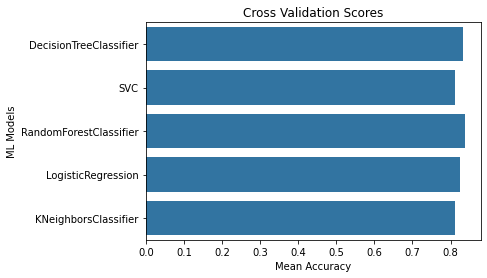

In [77]:
cv_results = pd.DataFrame({
    "Cross Validation Means": cv_result,
    "ML Models": ["DecisionTreeClassifier", "SVC", "RandomForestClassifier", "LogisticRegression", "KNeighborsClassifier"]
})

g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

<a id="33"></a><br>
## Ensemble Modelling

In [82]:
votingC = VotingClassifier(
    estimators=[
        ("dt", best_estimators[0]),
        ("rfc", best_estimators[2]),
        ("lr", best_estimators[3])
    ],
    voting="soft",
    n_jobs=-1
)

votingC.fit(X_train, y_train)
print("Accuracy Score: ", accuracy_score(y_test, votingC.predict(X_test)))

Accuracy Score:  0.7901785714285714


<a id="34"></a><br>
## Prediction & Submission

In [83]:
test_survived = pd.Series(votingC.predict(test), name="Survived").astype(int)
results = pd.concat([test_PassangerId, test_survived], axis=1)
results.to_csv("titanic.csv", index=False)

In [84]:
test_survived

0      0
1      1
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int32